<a href="https://colab.research.google.com/github/christopher-c-lee/Machine_Learning/blob/main/Titanic_Classification__Trees_Logistic_SectionA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import seaborn as sns

In [32]:
titanic = sns.load_dataset("titanic")
titanic.head()

# Let us drop some redundant and useless columns 

titanic.info()

titanic = titanic.drop(columns = ["class","who","adult_male", "embark_town", "alive", "alone", "deck"])

titanic.head()

titanic.info()

titanic.age.describe()

#Age has many missing values. Any algorithm that used models or distances (like nearest neighbors) CANNOT have missing values.

titanic.age.fillna(titanic.age.mean()) # this asks that the missing values be replaced by the columns mean.
                                    

# We want the age column ( with missing values) to be replaced by this column with missing values replaced by the mean 

titanic["age"] = titanic.age.fillna(titanic.age.mean()) # this says the replace the missing values in the column by the mean  

# Embarked has  missing values but just 2 - so let us just get rid of those rows

titanic = titanic.dropna() # drops all rows with any missing values 

titanic.info()

titanic.head(10)

# Now we want to replace the sex and embarked columns with dummy values ( we need to have only numerical values for computing distance). Pandas has a method .get_dummies(df) which creates dummy variables for all categorical columns. 

pd.get_dummies(titanic) # note that this does not replace the original data set 

titanic_unscaled = pd.get_dummies(titanic)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data co

In [6]:
titanic_unscaled.head()

,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [7]:
titanic_unscaled.shape

(889, 11)

Now let us divide this into training and validation dataset  - 70% and 30%

We split the cleaned up data into training and validation sets. 


In [8]:
from sklearn.model_selection import train_test_split 

In [9]:
train_predictors, valid_predictors, train_target, valid_target = train_test_split(titanic_unscaled.drop(columns = {"survived"}), 
                                                    titanic_unscaled[["survived"]], test_size=0.3)

In [10]:
train_predictors.shape

(622, 10)

In [11]:
train_predictors.head()

,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
859,3,29.699118,0,0,7.2292,0,1,1,0,0
580,2,25.000000,1,1,30.0000,1,0,0,0,1
758,3,34.000000,0,0,8.0500,0,1,0,0,1
348,3,3.000000,1,1,15.9000,0,1,0,0,1
433,3,17.000000,0,0,7.1250,0,1,0,0,1


In [12]:
valid_predictors.shape

(267, 10)

In [13]:
train_target.shape

(622, 1)

In [14]:
valid_target.shape

(267, 1)

In [15]:
valid_target.columns

Index(['survived'], dtype='object')

Now we are ready to build a decision tree  model  on the training data 


In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
tree_titanic = DecisionTreeClassifier(max_depth = 4, min_samples_split=40,min_samples_leaf = 10) # These are parameters that control the tree we build
tree_titanic.fit(train_predictors,train_target)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, min_samples_split=40)

Now that the model is created, we can apply it to the training and  validation data set to see how accurate its predictons are on the training and validation data set.  Each model type has a .predict method to you which you pass the predictor columns. 


In [18]:
tree_titanic_train_predict = pd.DataFrame(tree_titanic.predict(train_predictors), index = train_target.index, columns = {"Tree_prediction"} )
tree_titanic_train_predict

,Tree_prediction
859,0
580,1
758,0
348,1
433,0
...,...
886,0
79,0
347,0
401,0


In [19]:
train_target 

,survived
859,0
580,1
758,0
348,1
433,0
...,...
886,0
79,1
347,1
401,0


In [20]:
tree_titanic_valid_predict = pd.DataFrame(tree_titanic.predict(valid_predictors), index = valid_target.index, columns = {"Tree_prediction"} )
tree_titanic_valid_predict

,Tree_prediction
200,0
224,0
359,1
607,0
267,0
...,...
779,1
878,0
761,0
744,0


In [21]:
valid_target

,survived
200,0
224,1
359,1
607,1
267,1
...,...
779,1
878,0
761,0
744,1


In [24]:
!pip install dmba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 6.2 MB/s 


In [33]:
from dmba import classificationSummary 
from sklearn.metrics import classification_report

In [34]:
classes = ['Died', 'Survived']

In [35]:
print("TRAINING CONFUSION MATRIX")
classificationSummary(train_target,tree_titanic_train_predict, class_names=classes) 

print("VALIDATION CONFUSION MATRIX")

classificationSummary(valid_target,tree_titanic_valid_predict, class_names=classes) 

TRAINING CONFUSION MATRIX
Confusion Matrix (Accuracy 0.8312)

         Prediction
  Actual     Died Survived
    Died      353       32
Survived       73      164
VALIDATION CONFUSION MATRIX
Confusion Matrix (Accuracy 0.7940)

         Prediction
  Actual     Died Survived
    Died      146       18
Survived       37       66


In [28]:
valid_target.value_counts() ### checking that the numbers add up ! 

survived
0           164
1           103
dtype: int64

In [29]:
print(classification_report(valid_target,tree_titanic_valid_predict, target_names=classes))

              precision    recall  f1-score   support

        Died       0.80      0.89      0.84       164
    Survived       0.79      0.64      0.71       103

    accuracy                           0.79       267
   macro avg       0.79      0.77      0.77       267
weighted avg       0.79      0.79      0.79       267



In [30]:
from sklearn.tree import plot_tree
import matplotlib.pylab as plt
%matplotlib inline

<function matplotlib.pyplot.show(*args, **kw)>

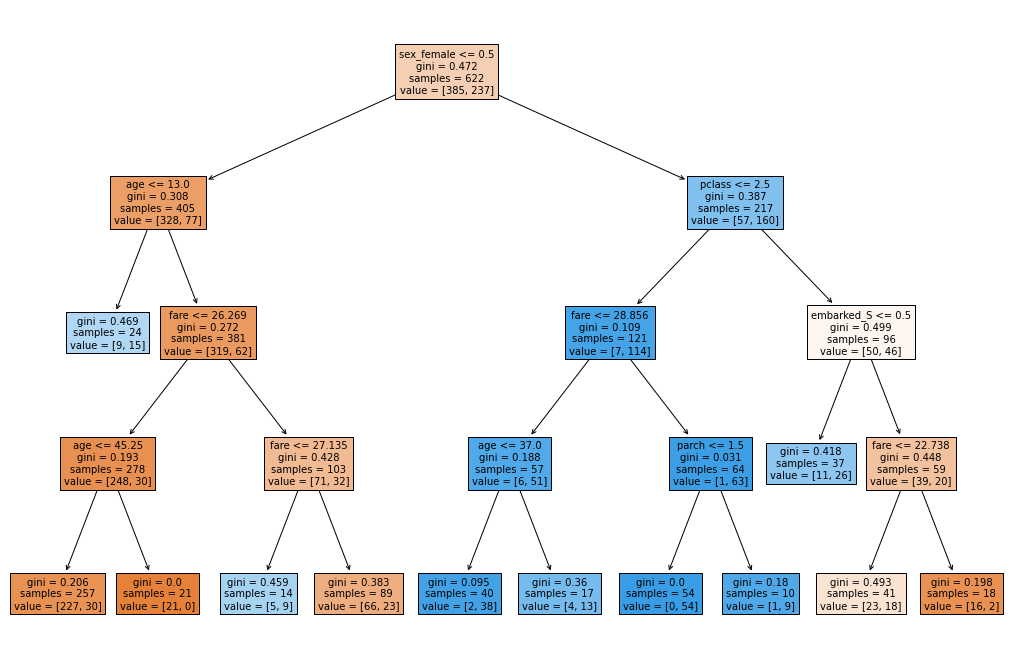

In [31]:
plt.figure(figsize=(18,12))  # set plot size (denoted in inches)
plot_tree(tree_titanic, feature_names=list(train_predictors.columns),filled=True, fontsize=10)
plt.show

### Now let us fit Random Forests 

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
# building a Random Forest Classifier model 
rf_titanic = RandomForestClassifier(n_estimators=20, random_state=1)
rf_titanic.fit(train_predictors,train_target)


<ipython-input-37-75cff1843ae1>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_titanic.fit(train_predictors,train_target)


RandomForestClassifier(n_estimators=20, random_state=1)

In [38]:
# Using the model to find what it predicts on the training dataset
rf_titanic_train_predict = pd.DataFrame(rf_titanic.predict(train_predictors), index = train_target.index, columns = {"rf_prediction"} )
rf_titanic_train_predict

,rf_prediction
859,0
580,1
758,0
348,1
433,0
...,...
886,0
79,1
347,1
401,0


In [39]:
# Using the model to find what it predicts on the validation  dataset
rf_titanic_valid_predict = pd.DataFrame(rf_titanic.predict(valid_predictors), index = valid_target.index, columns = {"rf_prediction"} )
rf_titanic_valid_predict

,rf_prediction
200,0
224,0
359,1
607,1
267,0
...,...
779,1
878,0
761,0
744,0


In [40]:
valid_target

,survived
200,0
224,1
359,1
607,1
267,1
...,...
779,1
878,0
761,0
744,1


How good is this random forest model?

Looking at the confusion matrix and accuracy scores for training and validation data 

In [42]:
print("TRAINING CONFUSION MATRIX")
classificationSummary(train_target,rf_titanic_train_predict, class_names=classes) 

print("VALIDATION CONFUSION MATRIX")

classificationSummary(valid_target,rf_titanic_valid_predict, class_names=classes) 

TRAINING CONFUSION MATRIX
Confusion Matrix (Accuracy 0.9743)

         Prediction
  Actual     Died Survived
    Died      381        4
Survived       12      225
VALIDATION CONFUSION MATRIX
Confusion Matrix (Accuracy 0.8052)

         Prediction
  Actual     Died Survived
    Died      139       25
Survived       27       76


Random Forest Models also assign class propensities which are extremely when predicting one class correctly is more important that the other due to the business context

In [43]:
rf_titanic.predict_proba(valid_predictors) 
### The method .predict_proba gives the actual probability as per the random forest 
###model for the observation to be in each class  

array([[0.95      , 0.05      ],
       [0.8       , 0.2       ],
       [0.035     , 0.965     ],
       [0.35      , 0.65      ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.335     , 0.665     ],
       [0.        , 1.        ],
       [0.55      , 0.45      ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.3       , 0.7       ],
       [0.1       , 0.9       ],
       [0.95      , 0.05      ],
       [0.85      , 0.15      ],
       [0.05      , 0.95      ],
       [0.5       , 0.5       ],
       [1.        , 0.        ],
       [0.85      , 0.15      ],
       [0.87833333, 0.12166667],
       [0.65      , 0.35      ],
       [0.35      , 0.65      ],
       [0.8       , 0.2       ],
       [0.9       , 0.1       ],
       [0.        , 1.        ],
       [0.85      , 0.15      ],
       [1.        , 0.        ],
       [0.95      , 0.05      ],
       [0.

In [44]:
## Let us create a dataframe with this probabilities 
rf_results = pd.DataFrame(rf_titanic.predict_proba(valid_predictors), index = valid_target.index, columns = ["propensity_for_0", "propensity_for_1"] )

In [45]:
rf_results.head()

,propensity_for_0,propensity_for_1
200,0.950,0.050
224,0.800,0.200
359,0.035,0.965
607,0.350,0.650
267,1.000,0.000


In [46]:
rf_results["rf_prediction"] = rf_titanic.predict(valid_predictors)
### The predicted class is the one where the propensity or porbability is greater than 0.5

In [47]:
rf_results["Actual Class"] = valid_target

In [48]:
rf_results

,propensity_for_0,propensity_for_1,rf_prediction,Actual Class
200,0.950000,0.050000,0,0
224,0.800000,0.200000,0,1
359,0.035000,0.965000,1,1
607,0.350000,0.650000,1,1
267,1.000000,0.000000,0,1
...,...,...,...,...
779,0.050000,0.950000,1,1
878,1.000000,0.000000,0,0
761,0.950000,0.050000,0,0
744,0.745833,0.254167,0,1


In [49]:
rf_results.rf_prediction.sum() ## confirming the number of predicted ( not actual survivals) from validation dataset 

101

In [50]:
sorted_rf_results = rf_results.sort_values("propensity_for_1") # sorting by propensity for class 1 

In [51]:
sorted_rf_results.reset_index()

,index,propensity_for_0,propensity_for_1,rf_prediction,Actual Class
0,828,1.0,0.0,0,1
1,743,1.0,0.0,0,0
2,815,1.0,0.0,0,0
3,753,1.0,0.0,0,0
4,560,1.0,0.0,0,0
...,...,...,...,...,...
262,535,0.0,1.0,1,1
263,472,0.0,1.0,1,1
264,256,0.0,1.0,1,1
265,835,0.0,1.0,1,1


In [52]:
sorted_rf_results.head()

,propensity_for_0,propensity_for_1,rf_prediction,Actual Class
828,1.0,0.0,0,1
743,1.0,0.0,0,0
815,1.0,0.0,0,0
753,1.0,0.0,0,0
560,1.0,0.0,0,0


In [53]:
sorted_rf_results[160:180] ### To see where the prediction changes from 0 to 1

,propensity_for_0,propensity_for_1,rf_prediction,Actual Class
533,0.550000,0.450000,0,1
768,0.525000,0.475000,0,0
567,0.500000,0.500000,0,0
693,0.500000,0.500000,0,0
128,0.500000,0.500000,0,1
165,0.500000,0.500000,0,1
816,0.475000,0.525000,1,0
298,0.450000,0.550000,1,1
137,0.450000,0.550000,1,0
740,0.450000,0.550000,1,1


In [54]:
forest_importances = pd.DataFrame(rf_titanic.feature_importances_, columns = {"Importance"})
forest_importances

,Importance
0,0.084154
1,0.267518
2,0.048402
3,0.039134
4,0.243786
5,0.095664
6,0.186554
7,0.011581
8,0.005917
9,0.017291


In [55]:
forest_importances["Predictor Names"] = train_predictors.columns

In [56]:
forest_importances

,Importance,Predictor Names
0,0.084154,pclass
1,0.267518,age
2,0.048402,sibsp
3,0.039134,parch
4,0.243786,fare
5,0.095664,sex_female
6,0.186554,sex_male
7,0.011581,embarked_C
8,0.005917,embarked_Q
9,0.017291,embarked_S


#### The above numbers give you a quantitative measure of the proportional importance of each predictor

###  Now let us apply Logistic Regression 

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
# building a logistic regression model 
logistic_titanic = LogisticRegression(solver="liblinear") # Please use this parameter to make sure the estimation algorithm works
logistic_titanic.fit(train_predictors,train_target)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(solver='liblinear')

In [61]:
print("TRAINING CONFUSION MATRIX")
classificationSummary(train_target,logistic_titanic.predict(train_predictors), class_names=classes) 

print("VALIDATION CONFUSION MATRIX")

classificationSummary(valid_target,logistic_titanic.predict(valid_predictors), class_names=classes) 

TRAINING CONFUSION MATRIX
Confusion Matrix (Accuracy 0.8103)

         Prediction
  Actual     Died Survived
    Died      338       47
Survived       71      166
VALIDATION CONFUSION MATRIX
Confusion Matrix (Accuracy 0.7828)

         Prediction
  Actual     Died Survived
    Died      140       24
Survived       34       69


In [62]:
 # Validation precision for survival = TP/(TP+FP)

In [63]:
# Validation Recall for survival = TP/(TP+ FN)

In [64]:
logistic_results = pd.DataFrame(logistic_titanic.predict_proba(valid_predictors), index = valid_target.index, columns = ["log_propensity_for_0", "log_propensity_for_1"] )

In [65]:
logistic_results

,log_propensity_for_0,log_propensity_for_1
200,0.887135,0.112865
224,0.662454,0.337546
359,0.329339,0.670661
607,0.536404,0.463596
267,0.901033,0.098967
...,...,...
779,0.088534,0.911466
878,0.895561,0.104439
761,0.936024,0.063976
744,0.901128,0.098872


In [66]:
logistic_results["logistic_prediction"] = logistic_titanic.predict(valid_predictors)

In [67]:
logistic_results["Actual Class"] = valid_target

In [68]:
logistic_results

,log_propensity_for_0,log_propensity_for_1,logistic_prediction,Actual Class
200,0.887135,0.112865,0,0
224,0.662454,0.337546,0,1
359,0.329339,0.670661,1,1
607,0.536404,0.463596,0,1
267,0.901033,0.098967,0,1
...,...,...,...,...
779,0.088534,0.911466,1,1
878,0.895561,0.104439,0,0
761,0.936024,0.063976,0,0
744,0.901128,0.098872,0,1


####  Let us compare to  the probabilities and the predictions for Random Forests - We will add the propensities found by Random forests to the above dataset

In [69]:
logistic_results.head(20)

,log_propensity_for_0,log_propensity_for_1,logistic_prediction,Actual Class
200,0.887135,0.112865,0,0
224,0.662454,0.337546,0,1
359,0.329339,0.670661,1,1
607,0.536404,0.463596,0,1
267,0.901033,0.098967,0,1
350,0.861547,0.138453,0,0
215,0.072156,0.927844,1,1
680,0.329082,0.670918,1,0
641,0.049053,0.950947,1,1
436,0.479090,0.520910,1,0
